In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from torch.utils.data import Dataset, DataLoader

In [4]:
trans = transforms.Compose([transforms.Resize((224,224)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])

trainset = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/Colab Notebooks/ml2021/data04/Train",
                                           transform = trans)

In [5]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True)

In [6]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # 갱신이 될 때까지 잠시 기다립니다.

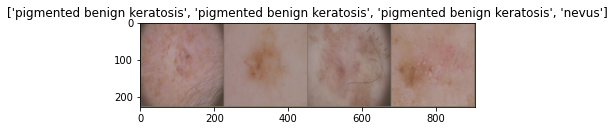

In [7]:
inputs, classes = next(iter(train_loader))
class_names = trainset.classes
# 배치로부터 격자 형태의 이미지를 만듭니다.
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [8]:
classes.shape

torch.Size([4])

In [9]:
import torchvision.models as models
net=models.vgg19(pretrained = True)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [10]:
net.classifier[-1].out_features = 4

# freeze convolution weights
for param in net.features.parameters():
    param.requires_grad = False

In [11]:
optimizer = optim.SGD(net.classifier.parameters(), lr=0.001, momentum=0.9)
# loss function
criterion = nn.CrossEntropyLoss()

In [14]:
net.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [15]:
for epoch in range(29):
  total = 0
  print("Training...")
  running_loss = 0.0
  correct = 0
  for i, data in enumerate(train_loader, 0):
      inputs, labels = data
      inputs, labels = inputs.cuda(), labels.cuda()
      imputs, lables = Variable(inputs.float().cuda()), Variable(labels.float().cuda())
      if i%100 == 0 :
          print("Training...",i)  
      optimizer.zero_grad()
      outputs = net(inputs)
      loss = criterion(outputs, labels)
        
      loss.backward()
      optimizer.step()
        
      max_index = outputs.max(dim=1)[1]
      correct += (max_index == labels).sum().item()
      total += labels.size(0)


      running_loss += loss.item()
      if i % len(train_loader) == len(train_loader) - 1:
        print('[epoc: %d, %5d] training loss: %.3f' %
              (epoch + 1, i + 1, running_loss / len(train_loader)))
  print("Training Accuracy = {}".format(100 * correct / total))

            
print('finish') 

Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 1,   325] training loss: 1.758
Training Accuracy = 42.713955281418656
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 2,   325] training loss: 1.016
Training Accuracy = 60.678488820354666
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 3,   325] training loss: 0.765
Training Accuracy = 71.47262914417887
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 4,   325] training loss: 0.592
Training Accuracy = 78.25751734772552
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 5,   325] training loss: 0.456
Training Accuracy = 82.42097147262915
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 6,   325] training loss: 0.352
Training Accuracy = 86.12181958365458
Training...
Training... 0
Training... 100
Training... 200
Training... 300
[epoc: 7,   325] trainin

In [16]:
PATH = '/content/drive/MyDrive/Colab Notebooks/ml2021/Resnet18.pth'
torch.save(net.state_dict(), PATH)

In [17]:
trans = transforms.Compose([transforms.Resize((224,224)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])

testset = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/Colab Notebooks/ml2021/data04/Test",
                                           transform = trans)

In [18]:
testloader = torch.utils.data.DataLoader(testset, batch_size = 4,
                                         shuffle = False)

In [19]:
correct = 0
total = 0
with torch.no_grad():
    for i, data in enumerate(testloader, 0):
        images, labels = data
        images, labels = images.float().cuda(), labels.float().cuda()

        outputs = net(images)
        max_index = outputs.max(dim=1)[1]
        total += labels.size(0)
        correct += (max_index == labels).sum().item()

print('Accuracy of Test: %d %%' % (100 * correct / total))

Accuracy of Test: 78 %
